In [24]:
import pandas as pd
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import time

In [25]:
import pandas as pd
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [26]:
df = pd.read_table("dataset_breast_cancer_prediction.txt", sep=",", on_bad_lines='skip', header=None,
                  names=['Age', 'BI-RADS','Cancer','Comparison',
                         'density','relative','useOfhormone','priorindicator',
                         'biopsy','digital','type','Body_Mass_Index','ID'])
  
#display DataFrame
print(df.info())
display(df.head())

print(df.columns)
for col in df.columns:
    print(df[col].unique())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              39998 non-null  int64 
 1   BI-RADS          39998 non-null  object
 2   Cancer           39998 non-null  bool  
 3   Comparison       39998 non-null  object
 4   density          39998 non-null  object
 5   relative         39998 non-null  object
 6   useOfhormone     39998 non-null  object
 7   priorindicator   39998 non-null  object
 8   biopsy           39998 non-null  object
 9   digital          39998 non-null  bool  
 10  type             39998 non-null  object
 11  Body_Mass_Index  39998 non-null  object
 12  ID               39998 non-null  int64 
dtypes: bool(2), int64(2), object(9)
memory usage: 3.4+ MB
None


,Age,BI-RADS,Cancer,Comparison,density,relative,useOfhormone,priorindicator,biopsy,digital,type,Body_Mass_Index,ID
0,62,Negative,False,Yes,'Scattered fibroglandular densities',No,No,Yes,No,False,'No cancer diagnosis',24.0235443,1
1,65,Negative,False,Yes,'Extremely dense',No,No,Yes,No,False,'No cancer diagnosis',Missing,2
2,69,'Needs additional imaging',False,Yes,'Scattered fibroglandular densities',No,No,Yes,No,False,'No cancer diagnosis',29.0524292,3
3,64,'Benign findings',False,Yes,'Scattered fibroglandular densities',No,No,Yes,No,False,'No cancer diagnosis',Missing,4
4,63,'Probably benign',False,Yes,'Scattered fibroglandular densities',No,No,Yes,Yes,False,'No cancer diagnosis',33.7295227,5


Index(['Age', 'BI-RADS', 'Cancer', 'Comparison', 'density', 'relative',
       'useOfhormone', 'priorindicator', 'biopsy', 'digital', 'type',
       'Body_Mass_Index', 'ID'],
      dtype='object')
[62 65 69 64 63 75 66 78 70 67 74 61 71 77 60 73 81 79 72 80 68 83 85 82
 84 86 76 87 89 88]
['Negative' "'Needs additional imaging'" "'Benign findings'"
 "'Probably benign'" "'Suspicious abnormality'"
 "'Highly suggestive of malignancy'"]
[False  True]
['Yes' 'No' 'Missing']
["'Scattered fibroglandular densities'" "'Extremely dense'"
 "'Heterogeneously dense'" "'Almost entirely fatty'"]
['No' 'Yes' 'Missing']
['No' 'Missing' 'Yes']
['Yes' 'No' 'Missing']
['No' 'Yes' 'Missing']
[False  True]
["'No cancer diagnosis'" "'Invasive cancer'" "'ductal carcinoma in situ'"]
['24.0235443' 'Missing' '29.0524292' ... '29.8625793' '19.6293335'
 '35.680542']
[    1     2     3 ... 36712 36713 36714]


In [27]:
import numpy as np

In [28]:
print(df['Cancer'].value_counts())
print(df['type'].value_counts())

False    39739
True       259
Name: Cancer, dtype: int64
'No cancer diagnosis'         39739
'Invasive cancer'               203
'ductal carcinoma in situ'       56
Name: type, dtype: int64


In [29]:
df['BI-RADS'] = df['BI-RADS'].map({'Negative':1, "'Needs additional imaging'":2, "'Benign findings'":3,
                             "'Probably benign'" :4, "'Suspicious abnormality'":5, "'Highly suggestive of malignancy'":6})
df['Cancer'] = df['Cancer'].map({False:1, True:2})
df['Comparison'] = df['Comparison'].map({'No':1, 'Yes':2, 'Missing':np.nan})
df['density'] = df['density'].map({"'Scattered fibroglandular densities'":1, "'Extremely dense'":2, "'Heterogeneously dense'":3,"'Almost entirely fatty'":4})
df['relative'] = df['relative'].map({'No':1, 'Yes':2, 'Missing':np.nan})
df['useOfhormone'] = df['useOfhormone'].map({'No':1, 'Yes':2, 'Missing':np.nan})
df['priorindicator'] = df['priorindicator'].map({'No':1, 'Yes':2, 'Missing':np.nan})
df['biopsy'] = df['biopsy'].map({'No':1, 'Yes':2, 'Missing':np.nan})
df['digital'] = df['digital'].map({False:1, True:2})
df['type'] = df['type'].map({"'No cancer diagnosis'" :1, "'Invasive cancer'":2, "'ductal carcinoma in situ'":3})
df['Body_Mass_Index'] = df['Body_Mass_Index'].replace('Missing', np.nan)

In [30]:
print(df.info())
display(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              39998 non-null  int64  
 1   BI-RADS          39998 non-null  int64  
 2   Cancer           39998 non-null  int64  
 3   Comparison       35318 non-null  float64
 4   density          39998 non-null  int64  
 5   relative         39770 non-null  float64
 6   useOfhormone     38226 non-null  float64
 7   priorindicator   39420 non-null  float64
 8   biopsy           39183 non-null  float64
 9   digital          39998 non-null  int64  
 10  type             39998 non-null  int64  
 11  Body_Mass_Index  16790 non-null  object 
 12  ID               39998 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 4.0+ MB
None


,Age,BI-RADS,Cancer,Comparison,density,relative,useOfhormone,priorindicator,biopsy,digital,type,Body_Mass_Index,ID
0,62,1,1,2.0,1,1.0,1.0,2.0,1.0,1,1,24.0235443,1
1,65,1,1,2.0,2,1.0,1.0,2.0,1.0,1,1,NaN,2
2,69,2,1,2.0,1,1.0,1.0,2.0,1.0,1,1,29.0524292,3
3,64,3,1,2.0,1,1.0,1.0,2.0,1.0,1,1,NaN,4
4,63,4,1,2.0,1,1.0,1.0,2.0,2.0,1,1,33.7295227,5
5,65,3,1,2.0,3,1.0,1.0,2.0,1.0,2,1,NaN,6
6,65,1,1,2.0,3,1.0,1.0,2.0,2.0,2,1,NaN,7
7,75,1,1,2.0,1,1.0,1.0,2.0,2.0,1,1,24.7460175,8
8,64,3,1,2.0,1,1.0,1.0,2.0,1.0,1,1,NaN,9
9,66,1,1,2.0,3,1.0,1.0,2.0,1.0,1,1,16.4610291,10


In [31]:
for i in range(df.shape[1]) :
    print('{0} : {1} null-values'.format(df.columns.values[i], df[df.columns.values[i]].isnull().sum()))

Age : 0 null-values
BI-RADS : 0 null-values
Cancer : 0 null-values
Comparison : 4680 null-values
density : 0 null-values
relative : 228 null-values
useOfhormone : 1772 null-values
priorindicator : 578 null-values
biopsy : 815 null-values
digital : 0 null-values
type : 0 null-values
Body_Mass_Index : 23208 null-values
ID : 0 null-values


In [32]:
df = df.replace(np.nan, 0)

In [33]:
df.info()
df['Body_Mass_Index'] = pd.to_numeric(df['Body_Mass_Index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              39998 non-null  int64  
 1   BI-RADS          39998 non-null  int64  
 2   Cancer           39998 non-null  int64  
 3   Comparison       39998 non-null  float64
 4   density          39998 non-null  int64  
 5   relative         39998 non-null  float64
 6   useOfhormone     39998 non-null  float64
 7   priorindicator   39998 non-null  float64
 8   biopsy           39998 non-null  float64
 9   digital          39998 non-null  int64  
 10  type             39998 non-null  int64  
 11  Body_Mass_Index  39998 non-null  object 
 12  ID               39998 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 13 columns):
 #   Column           Non-Null

In [34]:
df.describe()

,Age,BI-RADS,Cancer,Comparison,density,relative,useOfhormone,priorindicator,biopsy,digital,type,Body_Mass_Index,ID
count,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000
mean,69.555703,1.628856,1.006475,1.733437,2.041002,1.162883,1.061928,1.963698,1.240887,1.500025,1.007875,11.277390,18375.832942
std,7.202581,0.899858,0.080209,0.655385,1.171824,0.384391,0.383016,0.252759,0.472883,0.500006,0.103023,13.754138,10601.965716
min,60.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,63.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,9202.250000
50%,68.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,18391.500000
75%,75.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,24.691544,27561.750000
max,89.000000,6.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,71.721313,36714.000000


In [35]:

df['Body_Mass_Index'] = df['Body_Mass_Index'].replace(0, df['Body_Mass_Index'].mean())

In [36]:
df.describe()

,Age,BI-RADS,Cancer,Comparison,density,relative,useOfhormone,priorindicator,biopsy,digital,type,Body_Mass_Index,ID
count,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000
mean,69.555703,1.628856,1.006475,1.733437,2.041002,1.162883,1.061928,1.963698,1.240887,1.500025,1.007875,17.820859,18375.832942
std,7.202581,0.899858,0.080209,0.655385,1.171824,0.384391,0.383016,0.252759,0.472883,0.500006,0.103023,8.518401,10601.965716
min,60.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.277390,1.000000
25%,63.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,11.277390,9202.250000
50%,68.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,11.277390,18391.500000
75%,75.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,24.691544,27561.750000
max,89.000000,6.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,71.721313,36714.000000


<AxesSubplot:>

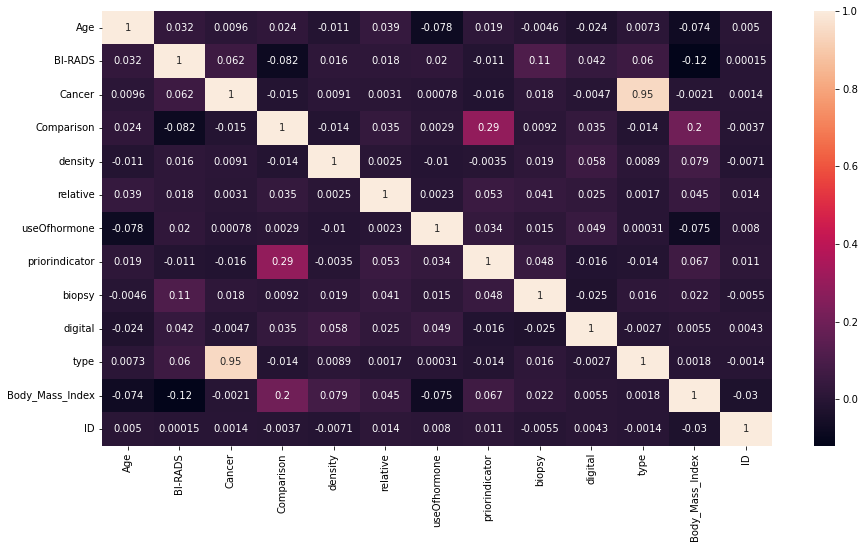

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True)

In [38]:
df_y=df.iloc[:,2:3]
df_y_type = df.iloc[:,10:11]

display(df_y.head())
display(df_y_type.head())


,Cancer
0,1
1,1
2,1
3,1
4,1


,type
0,1
1,1
2,1
3,1
4,1


In [39]:
df_x = df.drop(['ID', 'Cancer', 'type'], axis = 1)

In [40]:
print(df_x)

       Age  BI-RADS  Comparison  density  relative  useOfhormone  \
0       62        1         2.0        1       1.0           1.0   
1       65        1         2.0        2       1.0           1.0   
2       69        2         2.0        1       1.0           1.0   
3       64        3         2.0        1       1.0           1.0   
4       63        4         2.0        1       1.0           1.0   
...    ...      ...         ...      ...       ...           ...   
39993   80        1         2.0        4       1.0           1.0   
39994   78        1         2.0        3       1.0           1.0   
39995   77        1         2.0        1       1.0           1.0   
39996   66        1         2.0        1       1.0           1.0   
39997   61        1         2.0        3       1.0           1.0   

       priorindicator  biopsy  digital  Body_Mass_Index  
0                 2.0     1.0        1        24.023544  
1                 2.0     1.0        1        11.277390  
2        

In [41]:
print("Shape of x: ", df_x.shape)
print("Shape of y: ", df_y.shape)

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 10)

Shape of x:  (39998, 10)
Shape of y:  (39998, 1)


In [42]:
def model_selection(x_train, x_test, y_train, y_test) :
    print()
    print()
    for c_depth in [2, 4, 6, 8, 10, 12] : 
        print("model selection depth = {0}".format(c_depth))
        clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=c_depth)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print("score: {0} ".format(accuracy_score(y_test, y_pred)*100))

In [43]:
model_selection(X_train, X_test, y_train, y_test)



model selection depth = 2
score: 99.30833333333334 
model selection depth = 4
score: 99.33333333333333 
model selection depth = 6
score: 99.30833333333334 
model selection depth = 8
score: 99.28333333333333 
model selection depth = 10
score: 99.24166666666666 
model selection depth = 12
score: 99.2 


In [44]:
start = time.time()
# Building a Support Vector Machine on train data

svc_model = SVC()
svc_model.fit(X_train, y_train.values.ravel())
prediction = svc_model .predict(X_test)

print(time.time()-start)

# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print(accuracy_score(y_test, prediction))

3.323840856552124
0.9935709693549539
0.9934166666666666
0.9934166666666666
